# SciPy - ODR

ODR (Orthogonal Distance Regression) is used in the regression studies. 

Basic linear regression is often used to estimate the relationship between the two variables y and x by drawing the line of best fit on the graph.

The mathematical method that is used for this is known as Least Squares, and aims to minimize the sum of the squared error for each point. 

The key question here is how do you calculate the error (also known as the residual) for each point?

In a standard linear regression, the aim is to predict the Y value from the X value – so the sensible thing to do is to calculate the error in the Y values (shown as the gray lines in the following image). 

However, sometimes it is more sensible to take into account the error in both X and Y (as shown by the dotted red lines in the following image).

For example − When you know your measurements of X are uncertain, or when you do not want to focus on the errors of one variable over another.

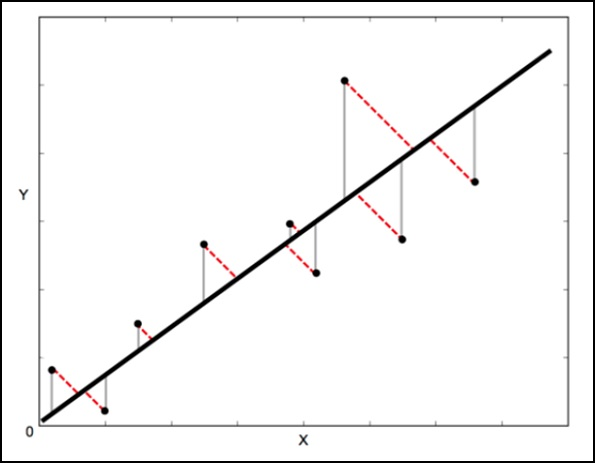

Orthogonal Distance Regression (ODR) is a method that can do this (orthogonal in this context means perpendicular – so it calculates errors perpendicular to the line, rather than just 'vertically').

## scipy.odr Implementation for Univariate Regression

The following example demonstrates scipy.odr implementation for univariate regression.

# Orthogonal distance regression (scipy.odr)

https://docs.scipy.org/doc/scipy/reference/odr.html
    
## Why Orthogonal Distance Regression (ODR)?

Sometimes one has measurement errors in the explanatory (a.k.a., “independent”) variable(s), not just the response (a.k.a., “dependent”) variable(s).

Ordinary Least Squares (OLS) fitting procedures treat the data for explanatory variables as fixed, i.e., not subject to error of any kind. 

Furthermore, OLS procedures require that the response variables be an explicit function of the explanatory variables.

Sometimes making the equation explicit is impractical and/or introduces errors. 

ODR can handle both of these cases with ease, and can even reduce to the OLS case if that is sufficient for the problem.


In [ ]:
# Five Steps in ODR (Orthogonal Distance Regression)
1. Define the function you want to fit against.
2. Create a Model.
3. Create a Data or RealData instance or, when the actual covariances are known.
4. Instantiate ODR with your data, model and initial parameter estimate.
5. Run the fit.
6. Examine output.

Beta: [ 5.51909098 -4.20016839]
Beta Std Error: [0.89226929 2.66284176]
Beta Covariance: [[ 1.973925   -4.9348131 ]
 [-4.9348131  17.58042938]]
Residual Variance: 0.4033306642486756
Inverse Condition #: 0.16003719058306934
Reason(s) for Halting:
  Sum of squares convergence


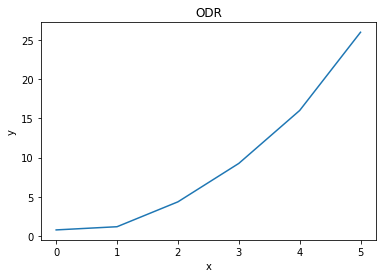

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random

# Initiate some data, giving some randomness using random.random().
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([i**2 + random.random() for i in x])

# 1. Define the function you want to fit against.
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same form
    return B[0]*x + B[1]

# 2. Create a Model.
linear = Model(f)
# 3. Create a Data or RealData instance.:
#mydata = Data(x, y, wd=1./power(sx,2), we=1./power(sy,2))
# or, when the actual covariances are known:
mydata = RealData(x, y)
# 4. Instantiate ODR with your data, model and initial parameter estimate.
myodr = ODR(mydata, linear, beta0=[1., 2.])
# 5. Run the fit.
myoutput = myodr.run()
# 6. Examine output.
myoutput.pprint()

plt.title ("ODR")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()